# Automatic Ticket Classification Using NLP

## Problem Statement

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

We need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [1]:
# Importing the json module for working with JSON data
import json

# Importing the numpy library for numerical operations
import numpy as np

# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing regular expressions, nltk, spaCy, and string modules for text processing
import re
import nltk
import spacy
import string

# Loading the small English language model from spaCy
import en_core_web_sm
nlp = en_core_web_sm.load()

# Importing seaborn for data visualization
import seaborn as sns

# Importing matplotlib for plotting
import matplotlib.pyplot as plt
# Enabling inline plotting for Jupyter notebooks
%matplotlib inline

# Importing warnings module to manage warnings
import warnings
# Ignoring all warnings
warnings.filterwarnings('ignore')

# Importing plotly modules for interactive plotting
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

# Importing scikit-learn modules for text feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

# Importing pprint for pretty-printing data structures
from pprint import pprint

# Importing tqdm for showing progress bars in loops
from tqdm import tqdm, tqdm_notebook

import pickle

# row/column display limit
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Define the path to the JSON file
json_file_path = '/content/drive/My Drive/Data Science/05-NLP/06-NLP Case Study - Automatic Ticket Classification/complaints-2021-05-14_08_16.json'

# Opening JSON file
with open(json_file_path, 'r') as f:
    # returns JSON object as a dictionary
    data = json.load(f)

# Step 4: Normalize JSON data into a flat table
df = pd.json_normalize(data)

# Step 5: Display the DataFrame
df.head()

Mounted at /content/drive


,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


## Data preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [4]:
#print the column names
print(df.columns)

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received', '_source.state',
       '_source.consumer_disputed', '_source.product', '_source.company_response',
       '_source.company', '_source.submitted_via', '_source.date_sent_to_company',
       '_source.company_public_response', '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')


In [5]:
#Assign new column names
columns = [(item.strip('_').replace('source.', '')) for item in df.columns]
print(columns)
df.columns = columns
df.columns

['index', 'type', 'id', 'score', 'tags', 'zip_code', 'complaint_id', 'issue', 'date_received', 'state', 'consumer_disputed', 'product', 'company_response', 'company', 'submitted_via', 'date_sent_to_company', 'company_public_response', 'sub_product', 'timely', 'complaint_what_happened', 'sub_issue', 'consumer_consent_provided']


Index(['index', 'type', 'id', 'score', 'tags', 'zip_code', 'complaint_id', 'issue',
       'date_received', 'state', 'consumer_disputed', 'product', 'company_response', 'company',
       'submitted_via', 'date_sent_to_company', 'company_public_response', 'sub_product', 'timely',
       'complaint_what_happened', 'sub_issue', 'consumer_consent_provided'],
      dtype='object')

In [6]:
#Assign nan in place of blanks in the complaints column
df['complaint_what_happened'].replace('', np.nan, inplace=True)

In [7]:
#Remove all rows where complaints column is nan
df.dropna(subset=['complaint_what_happened'],inplace=True)

In [8]:
df['complaint_what_happened'].isnull().sum()

0

In [9]:
df.shape

(21072, 22)

## Prepare the text for topic modeling

Once we have removed all the blank complaints, we need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once we have done these cleaning operations we need to perform the following:
* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


In [10]:
# Write your function here to clean the text and remove all the unnecessary elements.
def clean_text(text):
  text=text.lower()  #convert to lower case
  text=re.sub(r'^\[[\w\s]\]+$',' ',text) #Remove text in square brackets
  text=re.sub(r'[^\w\s]',' ',text) #Remove punctuation
  text=re.sub(r'^[a-zA-Z]\d+\w*$',' ',text) #Remove words with numbers
  return text

In [11]:
#Write your function to Lemmatize the texts
import spacy
from tqdm import tqdm

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Get the default stopwords list from spaCy
stopwords = nlp.Defaults.stop_words

def lemmatization(texts):
    """
    Lemmatizes the input texts and removes stopwords.

    Parameters:
    texts (list of str): List of sentences or texts to be lemmatized.

    Returns:
    list of str: List of lemmatized sentences with stopwords removed.
    """
    lemma_sentences = []  # Initialize an empty list to store the lemmatized sentences

    # Process texts in batches for efficiency, disabling the parser and named entity recognition for speed
    for doc in tqdm(nlp.pipe(texts, batch_size=32, n_process=6, disable=["parser", "ner"])):
        # Lemmatize each token and remove stopwords
        sent = [token.lemma_ for token in doc if token.text not in set(stopwords)]
        # Join the lemmatized tokens back into a single string and add to the results list
        lemma_sentences.append(' '.join(sent))

    return lemma_sentences


In [12]:
df_clean = pd.DataFrame()
df_clean['complaint_what_happened'] = df['complaint_what_happened'].apply(lambda x: clean_text(x))
df_clean['complaint_what_happened_lemmatized'] = lemmatization(df_clean['complaint_what_happened'])

21072it [11:28, 30.59it/s] 


In [13]:
# adding category and sub_category columns to the dataframe for better topic identification
df_clean['category'] = df['product']
df_clean['sub_category'] = df['sub_product']

In [14]:
#Write your function to extract the POS tags

def extract_pos_tags(texts):
    """
    Extracts tokens with a specified part-of-speech (POS) tag from the input texts.

    Parameters:
    texts (list of str): List of sentences or texts to be processed.

    Returns:
    list of str: List of sentences containing only the tokens with the specified POS tag.
    """
    pos_sentences = []  # Initialize an empty list to store sentences with specified POS tags

    # Process texts in batches for efficiency, disabling the parser and named entity recognition for speed
    for doc in tqdm(nlp.pipe(texts, batch_size=32, n_process=6, disable=["parser", "ner"])):
        # Extract tokens with the specified POS tag (NN - noun)
        sent = [token.text for token in doc if token.tag_ == 'NN']
        # Join the tokens back into a single string and add to the results list
        pos_sentences.append(' '.join(sent))

    return pos_sentences

df_clean["complaint_POS_removed"] = extract_pos_tags(df_clean['complaint_what_happened_lemmatized']) #this column should contain lemmatized text with all the words removed which have tags other than NN[tag == "NN"].


21072it [05:55, 59.32it/s] 


In [15]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean.head()

,complaint_what_happened,complaint_what_happened_lemmatized,category,sub_category,complaint_POS_removed
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n 2018 write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,Debt collection,Credit card debt,morning help bank service write chase debt verification statement bank validate debt mail month attempt debt information consumer chase account xxxx help
2,i upgraded my xxxx xxxx card in xx xx 2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card xx xx 2018 tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xx xx xxxx xx xx xxxx consent xxxx recording agent mislead,Credit card or prepaid card,General-purpose credit card or charge card,card agent upgrade anniversary date change agent information order upgrade account xxxx anniversary date xxxx consent agent
10,chase card was reported on xx xx 2019 however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report xx xx 2019 fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,"Credit reporting, credit repair services, or other personal consumer reports",Other personal consumer report,chase card report application submit identity consent service credit verify identity applicant
11,on xx xx 2018 while trying to book a xxxx xxxx ticket i came across an offer for 300 00 to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than 10minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than 10mins after putting in the application on xx xx 2018 notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on xx xx 2018 this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,xx xx 2018 try book xxxx xxxx ticket come offer 300 00 apply ticket apply reward card inform

## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




In [16]:
# Write your code here to visualise the data according to the 'Complaint' character length
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_clean['complaint_what_happened'].str.len(), name='Complaint'))
fig.add_trace(go.Histogram(x=df_clean['complaint_what_happened_lemmatized'].str.len(), name='Complaint Lemmatized'))
fig.add_trace(go.Histogram(x=df_clean['complaint_POS_removed'].str.len(), name='Complaint POS Removed'))
fig.update_layout(barmode='overlay', title='Complaint Character Length', xaxis_title='Character Length', yaxis_title='Count')
fig.update_traces(opacity=0.75)
fig.show()

#### Find the top 40 words by frequency among all the articles after processing the text.

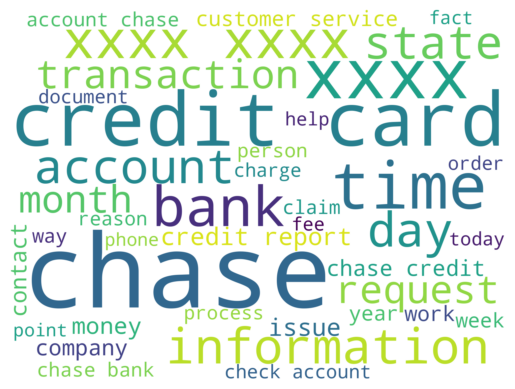

In [17]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud
wordcloud=WordCloud(stopwords=stopwords, background_color='white', width=2000, height=1500,max_words=40).generate(' '.join(df_clean['complaint_POS_removed']))
plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")
plt.show()

In [18]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [19]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean).
def get_top_n_words(corpus, n=None,count=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:count]

In [20]:
#Print the top 10 words in the unigram frequency
unigram = get_top_n_words(df_clean['Complaint_clean'], 1,30)
px.bar(x=[word for word, freq in unigram], y=[freq for word, freq in unigram], title='Top 30 Unigrams')

In [21]:
#Print the top 10 words in the unigram frequency
unigram = get_top_n_words(df_clean['Complaint_clean'], 1,10)
df_unigram = pd.DataFrame(unigram, columns = ['unigram' , 'count'])
df_unigram.head(10)

,unigram,count
0,chase,58457
1,xxxx,52886
2,account,43062
3,credit,33912
4,card,30137
5,payment,21329
6,bank,19976
7,time,16233
8,charge,15385
9,day,13243


In [22]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean).
bigram = get_top_n_words(df_clean['Complaint_clean'], 2,30)
px.bar(x=[word for word, freq in bigram], y=[freq for word, freq in bigram], title='Top 30 Bigrams')

In [23]:
#Print the top 30 words in the bigram frequency
bigram = get_top_n_words(df_clean['Complaint_clean'], 2,10)
df_bigram = pd.DataFrame(bigram, columns = ['bigram' , 'count'])
df_bigram.head(10)

,bigram,count
0,credit card,12862
1,xxxx xxxx,6127
2,credit report,3928
3,chase credit,3170
4,customer service,3004
5,call chase,2956
6,chase bank,2577
7,account chase,2507
8,check account,2349
9,chase account,2114


In [24]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean).
trigram = get_top_n_words(df_clean['Complaint_clean'], 3,30)
px.bar(x=[word for word, freq in trigram], y=[freq for word, freq in trigram], title='Top 30 Trigram')

In [25]:
#Print the top 10 words in the trigram frequency
trigram = get_top_n_words(df_clean['Complaint_clean'], 3,10)
df_trigram = pd.DataFrame(trigram, columns = ['trigram' , 'count'])
df_trigram.head(10)

,trigram,count
0,chase credit card,2275
1,xxxx xxxx xxxx,1713
2,credit card account,1061
3,credit card company,977
4,xxxx credit card,825
5,credit card chase,761
6,chase customer service,579
7,credit card xxxx,550
8,inquiry credit report,472
9,credit card credit,411


## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [26]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [27]:
#All masked texts has been removed
df_clean.head(5)

,complaint_what_happened,complaint_what_happened_lemmatized,category,sub_category,complaint_POS_removed,Complaint_clean
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n 2018 write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,Debt collection,Credit card debt,morning help bank service write chase debt verification statement bank validate debt mail month attempt debt information consumer chase account xxxx help,morning help bank service write chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help
2,i upgraded my xxxx xxxx card in xx xx 2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card xx xx 2018 tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xx xx xxxx xx xx xxxx consent xxxx recording agent mislead,Credit card or prepaid card,General-purpose credit card or charge card,card agent upgrade anniversary date change agent information order upgrade account xxxx anniversary date xxxx consent agent,card agent upgrade anniversary date change agent information order upgrade account anniversary date consent agent
10,chase card was reported on xx xx 2019 however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report xx xx 2019 fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,"Credit reporting, credit repair services, or other personal consumer reports",Other personal consumer report,chase card report application submit identity consent service credit verify identity applicant,chase card report application submit identity consent service credit verify identity applicant
11,on xx xx 2018 while trying to book a xxxx xxxx ticket i came across an offer for 300 00 to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than 10minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than 10mins after putting in the application on xx xx 2018 notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fac

## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [28]:
#Write your code here to initialise the TfidfVectorizer
tf_idf_vec=TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english')

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [29]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
tfidf=tf_idf_vec.fit_transform(df_clean['Complaint_clean'])

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints
* Correct the labels if needed
* Map the clusters to topics/cluster names

In [30]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [31]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)

In [32]:
nmf_model.fit(tfidf)
len(tf_idf_vec.get_feature_names_out())

6256

In [33]:
#Print the Top15 words for each of the topics
for index, topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index} with tf-idf score')
    print([tf_idf_vec.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0 with tf-idf score
['claim', 'customer', 'transaction', 'business', 'number', 'transfer', 'day', 'branch', 'fund', 'chase', 'deposit', 'money', 'bank', 'check', 'account']


THE TOP 15 WORDS FOR TOPIC #1 with tf-idf score
['service', 'time', 'reason', 'application', 'month', 'point', 'purchase', 'year', 'limit', 'score', 'account', 'balance', 'chase', 'credit', 'card']


THE TOP 15 WORDS FOR TOPIC #2 with tf-idf score
['date', 'statement', 'balance', 'property', 'rate', 'pay', 'year', 'time', 'home', 'modification', 'month', 'chase', 'mortgage', 'loan', 'payment']


THE TOP 15 WORDS FOR TOPIC #3 with tf-idf score
['dispute', 'letter', 'score', 'theft', 'remove', 'file', 'identity', 'account', 'reporting', 'debt', 'information', 'company', 'credit', 'inquiry', 'report']


THE TOP 15 WORDS FOR TOPIC #4 with tf-idf score
['statement', 'time', 'email', 'contact', 'service', 'fraud', 'purchase', 'refund', 'claim', 'merchant', 'transaction', 'chase', 'fee', 'disp

In [34]:
#Print the Top15 words for each of the topics
words = np.array(tf_idf_vec.get_feature_names_out())
topic_words_df = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)

for i in range(num_topics):
    ix = nmf_model.components_[i].argsort()[::-1][:15]
    topic_words_df.iloc[i] = words[ix]

topic_words_df

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,check,bank,money,deposit,chase,fund,branch,day,transfer,number,business,transaction,customer,claim
Topic 2,card,credit,chase,balance,account,score,limit,year,purchase,point,month,application,reason,time,service
Topic 3,payment,loan,mortgage,chase,month,modification,home,time,year,pay,rate,property,balance,statement,date
Topic 4,report,inquiry,credit,company,information,debt,reporting,account,identity,file,remove,theft,score,letter,dispute
Topic 5,charge,dispute,fee,chase,transaction,merchant,claim,refund,purchase,fraud,service,contact,email,time,statement


In [35]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_values = nmf_model.transform(tfidf)
topic_values.argmax(axis=1)

array([0, 1, 3, ..., 3, 1, 2])

In [36]:
#Assign the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] = topic_values.argmax(axis=1)

In [37]:
df_clean.head()

,complaint_what_happened,complaint_what_happened_lemmatized,category,sub_category,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n 2018 write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,Debt collection,Credit card debt,morning help bank service write chase debt verification statement bank validate debt mail month attempt debt information consumer chase account xxxx help,morning help bank service write chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help,0
2,i upgraded my xxxx xxxx card in xx xx 2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card xx xx 2018 tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xx xx xxxx xx xx xxxx consent xxxx recording agent mislead,Credit card or prepaid card,General-purpose credit card or charge card,card agent upgrade anniversary date change agent information order upgrade account xxxx anniversary date xxxx consent agent,card agent upgrade anniversary date change agent information order upgrade account anniversary date consent agent,1
10,chase card was reported on xx xx 2019 however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report xx xx 2019 fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,"Credit reporting, credit repair services, or other personal consumer reports",Other personal consumer report,chase card report application submit identity consent service credit verify identity applicant,chase card report application submit identity consent service credit verify identity applicant,3
11,on xx xx 2018 while trying to book a xxxx xxxx ticket i came across an offer for 300 00 to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than 10minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than 10mins after putting in the application on xx xx 2018 notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chas

In [38]:
#Print the first 5 Complaint for each of the Topics
df_clean.groupby('Topic').head(5).sort_values(by='Topic')

,complaint_what_happened,complaint_what_happened_lemmatized,category,sub_category,complaint_POS_removed,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n 2018 write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,Debt collection,Credit card debt,morning help bank service write chase debt verification statement bank validate debt mail month attempt debt information consumer chase account xxxx help,morning help bank service write chase debt verification statement bank validate debt mail month attempt debt information consumer chase account help,0
24,mishandling of this account by chase auto and xxxx,mishandle account chase auto xxxx,Vehicle loan or lease,Loan,mishandle account chase auto xxxx,mishandle account chase auto,0
17,with out notice j p morgan chase restricted my account by my debit card tuesday xx xx 2019 on thursday xx xx 2019 i went into a branch after being advised by a customer service representative that my account would actually be closed i went into the branch to see how i can remove the funds that are in there currently in as well as if my direct deposit from my place of employment would be returned the bank associate and the customer service representative assured me that the funds would post but they may take an additional business day that saturday i attempted to go inside of a branch yet again to retrieve my funds that actually did post on friday xx xx 2019 upon looking at my account i realize that the funds have been reversed and no longer were present on my current statement ive been called and i was told that it may take two business day stating tuesday xx xx xxxx would be the date that my funds would be available to withdraw from a bank teller only now chase is informing me that i will be mailed a check into the three business days to recover the funds that are owed to me and left in my account currently unfortunately this has put me in an additional financial bind do two fees from late rent late car payments etc i am not being a short or giving written notice that these things will actually occur so that i have peace of mind in fact chase has handled my situation grossly i even had a bank teller inform me that my account looks suspicious after giving me a suspicious look myself although i know that chase reserves the right to close my account at any time i do believe that their protocol has been in the past to give notice in the form of a written document i am not being a shored or giving written notice that these things will actually occur so that i have peace of mind in fact chase has handled my situation grossly i even had a bank teller inform me that my account looks suspicious after giving me a suspicious look myself although i know that chase reserves the right to close my account at any time i do believe that their protocol has been in the past to give notice in the form of a written document this situation is truly affecting my livelihood and they dont seem to want to deal with me professionally thank you,notice j p morgan chase restrict account debit card tuesday xx xx 2019 thursday xx xx 2019 go branch advise customer service representative account actually close go branch remove fund currently direct deposit place employment return bank associate customer service representative assure fund post additi

#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [39]:
df_clean.shape

(21072, 7)

In [40]:
#Create the dictionary of Topic names and Topics
Topic_names = {
    0: 'Bank Account services',
    1: 'Credit card or prepaid card',
    2: 'Others',
    3: 'Theft/Dispute Reporting',
    4: 'Mortgage/Loan'
}
#Replace Topics with Topic Names
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

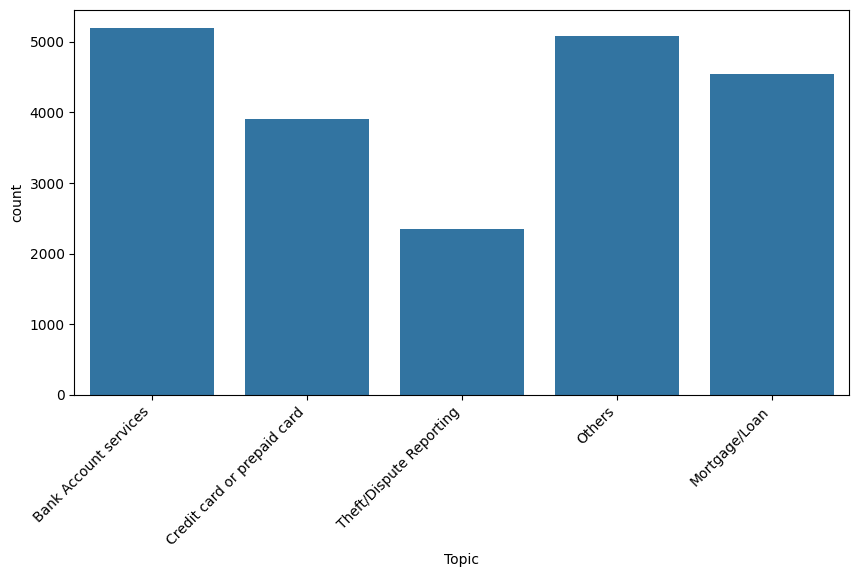

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='Topic',data=df_clean);
# Rotate the x-axis labels to 45 degrees and set them to be vertically aligned
plt.xticks(rotation=45, ha='right')
plt.show()

In [42]:
df_clean[['complaint_what_happened','Topic']].head()

,complaint_what_happened,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,Bank Account services
2,i upgraded my xxxx xxxx card in xx xx 2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,Credit card or prepaid card
10,chase card was reported on xx xx 2019 however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,Theft/Dispute Reporting
11,on xx xx 2018 while trying to book a xxxx xxxx ticket i came across an offer for 300 00 to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than 10minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than 10mins after putting in the application on xx xx 2018 notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on xx xx 2018 this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,Theft/Dispute Reporting
14,my grand son give me check for 1600 00 i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to verify the check owner he is out the country most the time date happen xx xx 2018 check number xxxx claim number is xxxx with chase,Bank Account services


## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [43]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data=df_clean[['complaint_what_happened','Topic']]

In [44]:
training_data.head()

,complaint_what_happened,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,Bank Account services
2,i upgraded my xxxx xxxx card in xx xx 2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,Credit card or prepaid card
10,chase card was reported on xx xx 2019 however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,Theft/Dispute Reporting
11,on xx xx 2018 while trying to book a xxxx xxxx ticket i came across an offer for 300 00 to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than 10minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than 10mins after putting in the application on xx xx 2018 notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on xx xx 2018 this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,Theft/Dispute Reporting
14,my grand son give me check for 1600 00 i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to verify the check owner he is out the country most the time date happen xx xx 2018 check number xxxx claim number is xxxx with chase,Bank Account services


####Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [45]:
count_vect=CountVectorizer()
#Write your code to get the Vector count
X_train_counts=count_vect.fit_transform(training_data['complaint_what_happened'])

#SAVE WORD VECTOR
pickle.dump(count_vect.vocabulary_, open("count_vector.pkl","wb"))

#Write your code here to transform the word vector to tf-idf
tfidf_transformer=TfidfTransformer()
X_train_tf=tfidf_transformer.fit_transform(X_train_counts)

#SAVE TF-IDF
pickle.dump(tfidf_transformer, open("tfidf.pkl","wb"))

You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import StratifiedKFold,GridSearchCV,train_test_split

from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [47]:
# Train-test split
train_X, test_X, train_y, test_y = train_test_split(X_train_tf, training_data['Topic'], test_size=0.2, random_state=40)

In [54]:
def eval_model(y_test, y_pred, y_pred_proba, type='Training', display_labels=None):
    """
    Evaluates the model performance and displays various metrics along with the confusion matrix.

    Parameters:
    y_test (array-like): True labels.
    y_pred (array-like): Predicted labels.
    y_pred_proba (array-like): Predicted probabilities.
    type (str): The type of evaluation (e.g., 'Training', 'Validation', 'Test'). Default is 'Training'.
    display_labels (array-like): List of labels to display on the confusion matrix. Default is None.
    """
    # Calculate and print the evaluation metrics
    print(f"{type} Accuracy: {round(accuracy_score(y_test, y_pred), 2)}")
    print(f"{type} Precision: {round(precision_score(y_test, y_pred, average='weighted'), 2)}")
    print(f"{type} Recall: {round(recall_score(y_test, y_pred, average='weighted'), 2)}")
    print(f"{type} F1 Score: {round(f1_score(y_test, y_pred, average='weighted'), 2)}")
    print(f"{type} ROC AUC Score: {round(roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class='ovr'), 2)}")

    # Print the classification report
    print(classification_report(y_test, y_pred))
    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot()
    plt.show()
    print('_______________________________________________________________________')



## Model 1. Logistic Regression

Training Accuracy: 0.96
Training Precision: 0.96
Training Recall: 0.96
Training F1 Score: 0.96
Training ROC AUC Score: 1.0
                             precision    recall  f1-score   support

      Bank Account services       0.96      0.98      0.97      4161
Credit card or prepaid card       0.97      0.96      0.97      3131
              Mortgage/Loan       0.96      0.95      0.96      3617
                     Others       0.97      0.98      0.97      4076
    Theft/Dispute Reporting       0.97      0.93      0.95      1872

                   accuracy                           0.96     16857
                  macro avg       0.96      0.96      0.96     16857
               weighted avg       0.96      0.96      0.96     16857



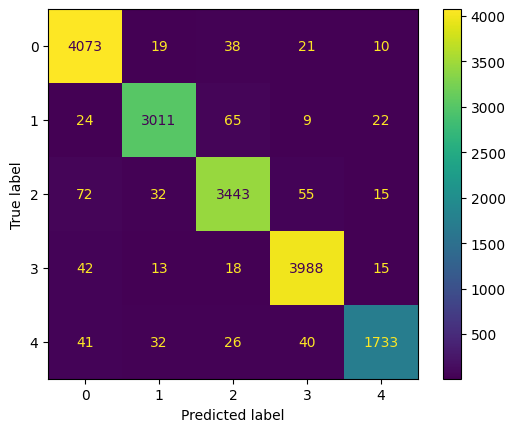

_______________________________________________________________________
Test Accuracy: 0.91
Test Precision: 0.91
Test Recall: 0.91
Test F1 Score: 0.91
Test ROC AUC Score: 0.99
                             precision    recall  f1-score   support

      Bank Account services       0.91      0.95      0.93      1032
Credit card or prepaid card       0.92      0.90      0.91       778
              Mortgage/Loan       0.89      0.86      0.88       923
                     Others       0.92      0.95      0.94      1009
    Theft/Dispute Reporting       0.93      0.87      0.90       473

                   accuracy                           0.91      4215
                  macro avg       0.91      0.91      0.91      4215
               weighted avg       0.91      0.91      0.91      4215



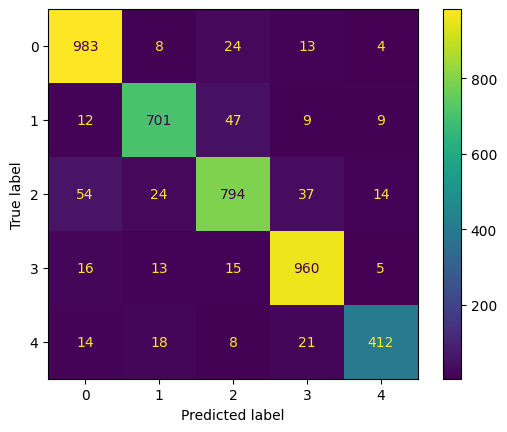

_______________________________________________________________________


In [55]:
#running and evaluating the Logistic Regression model
lr_model=LogisticRegression().fit(train_X, train_y)
eval_model(train_y,lr_model.predict(train_X),lr_model.predict_proba(train_X),type='Training')
eval_model(test_y,lr_model.predict(test_X),lr_model.predict_proba(test_X),type='Test')

#SAVE MODEL
pickle.dump(lr_model, open("logreg_model.pkl", "wb"))

## Model 2. Decision Tree

Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0
Training ROC AUC Score: 1.0
                             precision    recall  f1-score   support

      Bank Account services       1.00      1.00      1.00      4161
Credit card or prepaid card       1.00      1.00      1.00      3131
              Mortgage/Loan       1.00      1.00      1.00      3617
                     Others       1.00      1.00      1.00      4076
    Theft/Dispute Reporting       1.00      1.00      1.00      1872

                   accuracy                           1.00     16857
                  macro avg       1.00      1.00      1.00     16857
               weighted avg       1.00      1.00      1.00     16857



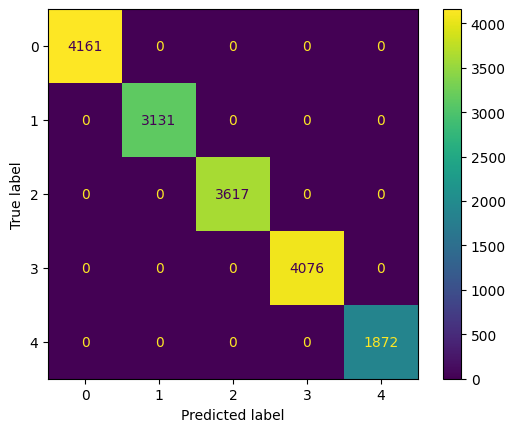

_______________________________________________________________________
Test Accuracy: 0.76
Test Precision: 0.76
Test Recall: 0.76
Test F1 Score: 0.76
Test ROC AUC Score: 0.85
                             precision    recall  f1-score   support

      Bank Account services       0.78      0.77      0.78      1032
Credit card or prepaid card       0.77      0.76      0.76       778
              Mortgage/Loan       0.69      0.68      0.69       923
                     Others       0.80      0.83      0.81      1009
    Theft/Dispute Reporting       0.72      0.72      0.72       473

                   accuracy                           0.76      4215
                  macro avg       0.75      0.75      0.75      4215
               weighted avg       0.76      0.76      0.76      4215



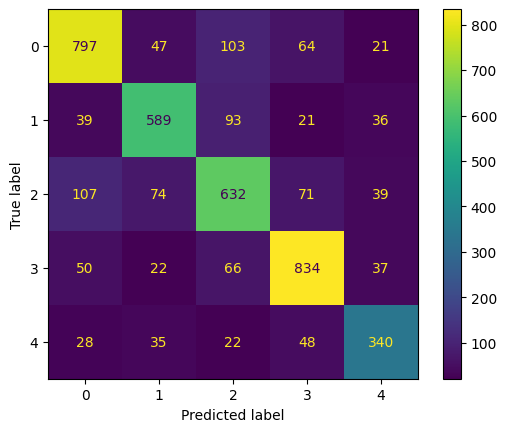

_______________________________________________________________________


In [56]:
#running and evaluating the Decision Tree model
dt_model= DecisionTreeClassifier().fit(train_X, train_y)
eval_model(train_y,dt_model.predict(train_X),dt_model.predict_proba(train_X),type='Training')
eval_model(test_y,dt_model.predict(test_X),dt_model.predict_proba(test_X),type='Test')

#SAVE MODEL
pickle.dump(dt_model, open("dt_model.pkl", "wb"))

## Model 3. Random Forest

Training Accuracy: 0.8
Training Precision: 0.83
Training Recall: 0.8
Training F1 Score: 0.79
Training ROC AUC Score: 0.98
                             precision    recall  f1-score   support

      Bank Account services       0.72      0.97      0.83      4161
Credit card or prepaid card       0.90      0.68      0.77      3131
              Mortgage/Loan       0.88      0.72      0.79      3617
                     Others       0.77      0.94      0.85      4076
    Theft/Dispute Reporting       0.98      0.48      0.65      1872

                   accuracy                           0.80     16857
                  macro avg       0.85      0.76      0.78     16857
               weighted avg       0.83      0.80      0.79     16857



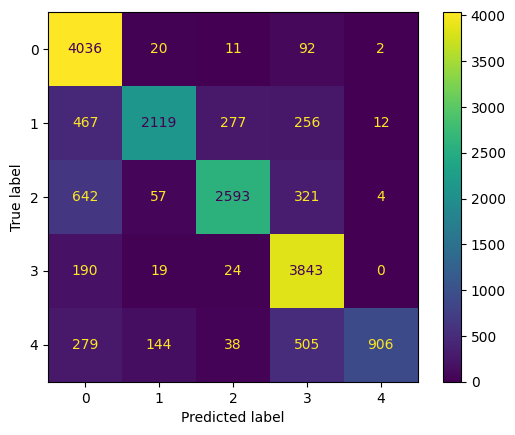

_______________________________________________________________________
Test Accuracy: 0.73
Test Precision: 0.76
Test Recall: 0.73
Test F1 Score: 0.72
Test ROC AUC Score: 0.96
                             precision    recall  f1-score   support

      Bank Account services       0.68      0.95      0.79      1032
Credit card or prepaid card       0.82      0.56      0.67       778
              Mortgage/Loan       0.77      0.59      0.67       923
                     Others       0.71      0.92      0.80      1009
    Theft/Dispute Reporting       0.96      0.42      0.59       473

                   accuracy                           0.73      4215
                  macro avg       0.79      0.69      0.70      4215
               weighted avg       0.76      0.73      0.72      4215



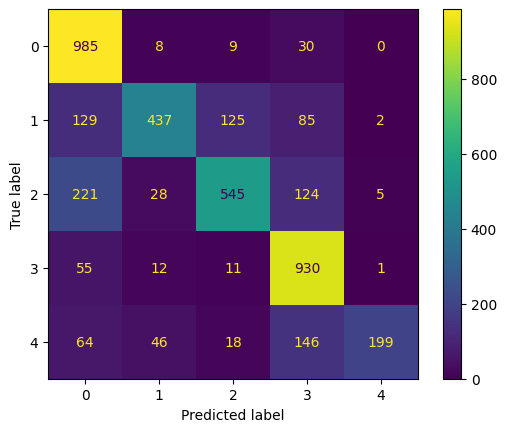

_______________________________________________________________________


In [57]:
#running and evaluating the Random Forest model
rf_model=RandomForestClassifier(max_depth=10)
rf_model.fit(train_X, train_y)
eval_model(train_y,rf_model.predict(train_X),rf_model.predict_proba(train_X),type='Training')
eval_model(test_y,rf_model.predict(test_X),rf_model.predict_proba(test_X),type='Test')

#SAVE MODEL
pickle.dump(rf_model, open("rf_model.pkl", "wb"))

## Model 4. Naive Bayes

Training Accuracy: 0.74
Training Precision: 0.77
Training Recall: 0.74
Training F1 Score: 0.72
Training ROC AUC Score: 0.96
                             precision    recall  f1-score   support

      Bank Account services       0.66      0.95      0.78      4161
Credit card or prepaid card       0.84      0.49      0.62      3131
              Mortgage/Loan       0.80      0.73      0.77      3617
                     Others       0.71      0.91      0.80      4076
    Theft/Dispute Reporting       0.96      0.30      0.45      1872

                   accuracy                           0.74     16857
                  macro avg       0.80      0.68      0.68     16857
               weighted avg       0.77      0.74      0.72     16857



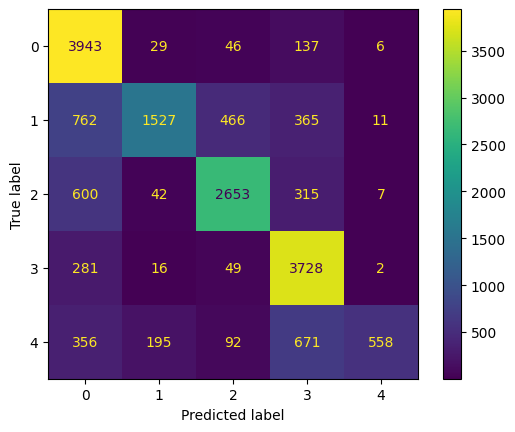

_______________________________________________________________________
Test Accuracy: 0.69
Test Precision: 0.73
Test Recall: 0.69
Test F1 Score: 0.67
Test ROC AUC Score: 0.94
                             precision    recall  f1-score   support

      Bank Account services       0.64      0.94      0.76      1032
Credit card or prepaid card       0.78      0.40      0.53       778
              Mortgage/Loan       0.72      0.66      0.69       923
                     Others       0.68      0.89      0.77      1009
    Theft/Dispute Reporting       0.98      0.26      0.41       473

                   accuracy                           0.69      4215
                  macro avg       0.76      0.63      0.63      4215
               weighted avg       0.73      0.69      0.67      4215



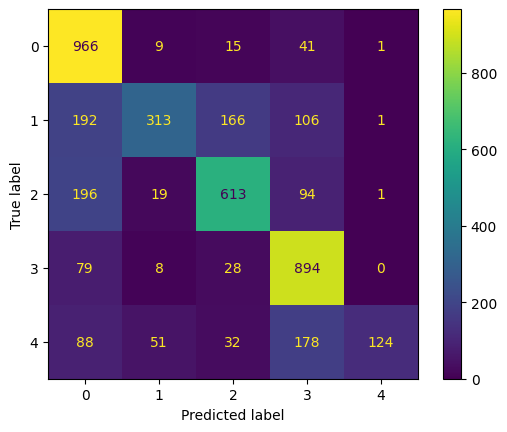

_______________________________________________________________________


In [58]:
#running and evaluating the Gaussian Naive Bayes model
nb_model=MultinomialNB().fit(train_X, train_y)
eval_model(train_y,nb_model.predict(train_X),nb_model.predict_proba(train_X),type='Training')
eval_model(test_y,nb_model.predict(test_X),nb_model.predict_proba(test_X),type='Test')

#SAVE MODEL
pickle.dump(nb_model, open("nb_model.pkl", "wb"))

## Final Results

| Model | Accuracy | Precision | Recall | F1 Score | ROC AUC Score |
|-------|----------|-----------|--------|---------|--------------|
| Logistic Regression | 0.91 | 0.91 | 0.91 | 0.91 | 0.99 |
| DecisionTreeClassifier | 0.76 | 0.76 | 0.76 | 0.76 | 0.85 |
| RandomForestClassifier | 0.82 | 0.82 | 0.82 | 0.81 | 0.97 |
| Naive Bayes | 0.69 | 0.73 | 0.69 | 0.67 | 0.94 |

## Conclusion
As from the results we can see that Logistic Regression is performing the best with an F1 score of 0.91. So we will be using this model to predict the topics for the new complaints.


In [67]:
loaded_model = pickle.load(open("logreg_model.pkl","rb"))
predicted = loaded_model.predict(test_X)
result_bayes = pd.DataFrame( {'true_labels': test_y,'predicted_labels': predicted})
result_bayes.head(20)

,true_labels,predicted_labels
8869,Bank Account services,Bank Account services
24522,Mortgage/Loan,Mortgage/Loan
43131,Others,Others
42932,Bank Account services,Bank Account services
73715,Credit card or prepaid card,Credit card or prepaid card
19997,Bank Account services,Bank Account services
25299,Bank Account services,Bank Account services
76123,Others,Others
32456,Theft/Dispute Reporting,Theft/Dispute Reporting
30283,Bank Account services,Bank Account services


## Infering the best model

In [59]:
# Some sample complaints to infer model

df_complaints = pd.DataFrame({'complaints': ["I can not get from chase who services my mortgage, who owns it and who has original loan docs",
                                  "The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.",
                                  "I want to open a salary account at your downtown branch. Please provide me the procedure.",
                                  "What is the procedure to know my CIBIL score?",
                                  "I need to know the number of bank branches and their locations in the city of Dubai",
                                 'I tried to make a transaction at a supermarket retail store, using my chase \ debit/atm card, but the transaction was declined. I am still able to withdraw money out of an \
ATM machine using the same debit card. Please resolve this issue.']})
df_complaints

,complaints
0,"I can not get from chase who services my mortgage, who owns it and who has original loan docs"
1,The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.
2,I want to open a salary account at your downtown branch. Please provide me the procedure.
3,What is the procedure to know my CIBIL score?
4,I need to know the number of bank branches and their locations in the city of Dubai
5,"I tried to make a transaction at a supermarket retail store, using my chase \ debit/atm card, but the transaction was declined. I am still able to withdraw money out of an ATM machine using the same debit card. Please resolve this issue."


In [60]:
#function to predict the topic of the given text

def predict_lr(text, model):
    loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
    loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
    X_new_counts = loaded_vec.transform(text)
    X_new_tfidf = loaded_tfidf.transform(X_new_counts)
    predicted = model.predict(X_new_tfidf)
    return predicted[0]

In [61]:
loaded_model = pickle.load(open("logreg_model.pkl","rb"))

df_complaints['tag'] = df_complaints['complaints'].apply(lambda x: predict_lr([x], loaded_model))
df_complaints

,complaints,tag
0,"I can not get from chase who services my mortgage, who owns it and who has original loan docs",Others
1,The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.,Credit card or prepaid card
2,I want to open a salary account at your downtown branch. Please provide me the procedure.,Bank Account services
3,What is the procedure to know my CIBIL score?,Bank Account services
4,I need to know the number of bank branches and their locations in the city of Dubai,Bank Account services
5,"I tried to make a transaction at a supermarket retail store, using my chase \ debit/atm card, but the transaction was declined. I am still able to withdraw money out of an ATM machine using the same debit card. Please resolve this issue.",Credit card or prepaid card
